# Compsci 571 Homework 2
Question 1 Basketball Court Classification
Yilin Gao (yg95)
Python 3.6

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from os import system

## the perceptron algorithm

In [6]:
# parameter S: numpy array for the dataset (training/testing)
#     S.shape = (n, p+1)
#     each row is sample {xi, yi}, with p features and 1 label
# parameter I: max number of epochs, default to 100
# return epoch_w: w vector for each epoch number from 0 to 99
#     epoch_w.shape = (100, p)

def perceptron(S, I = 100):
    n = S.shape[0]
    p = S.shape[1] - 1
    epoch_w = np.empty([0, p])
    w = np.zeros([1, p])
    ite = 0 # iteration defined as number of updates
    for e in range(0, I):
        mis = False # if in this epoch there is no more misclassified points
        for i in range(0, n):
            if S[i, -1].reshape(1, 1) * np.dot(w, S[i, 0:p]) <= 0:
                mis = True
                w = w + S[i, -1].reshape(1, 1) * S[i, 0:p]
                ite += 1
        epoch_w = np.append(epoch_w, w, axis = 0)
        if (mis == False): # after this epoch all points are correctly classified, end and return current w
            print('Perceptron algorithm ends at epoch ' + str(e) + '.')
            print('Perceptron algorithm ends after ' + str(ite) + ' iterations.')
            return epoch_w
    print('Perceptron maximum epoch is reached.')
    return epoch_w

## data

In [18]:
S = np.array([[0.75, 0.10, -1], [0.85, 0.8, -1], [0.85, 0.95, 1], [0.15, 0.1, -1], [0.05, 0.25, 1], [0.05, 0.5, 1], [0.85, 0.25, -1]])
n = S.shape[0]
print(S)

[[ 0.75  0.1  -1.  ]
 [ 0.85  0.8  -1.  ]
 [ 0.85  0.95  1.  ]
 [ 0.15  0.1  -1.  ]
 [ 0.05  0.25  1.  ]
 [ 0.05  0.5   1.  ]
 [ 0.85  0.25 -1.  ]]


## q1a

In [19]:
# run Perceptron to compute a linear classifier going though the origin on the dataset
# w initialized at [0, 0]
# scan the observed points in the given order

w_perc = perceptron(S)
print(w_perc)

Perceptron algorithm ends at epoch 2.
Perceptron algorithm ends after 7 iterations.
[[-0.9   0.5 ]
 [-1.05  1.1 ]
 [-1.05  1.1 ]]


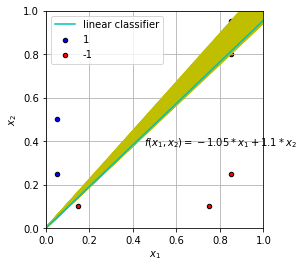

In [20]:
# plot observed data points, the perceptron boundary after convergence, and all other boundaries with same error rate

# training points
n_classes = 2
colors = 'br'
for yvalue, color in zip([1, -1], colors):
    idx = np.where(S[:, -1] == yvalue)
    plt.scatter(S[idx, 0], S[idx, 1], c = color, label = yvalue, edgecolor = 'black', s = 20)

# other decision boundaries with same error
x_other = 1.1
y_other = np.arange(1.035, 1.229, 0.002)
for yi in np.nditer(y_other):
    plt.plot([0, x_other], [0, yi], 'y')

# calculated decision boundary from perceptron
x_perc = w_perc[-1, 1]
y_perc = -1 * w_perc[-1, 0]
plt.plot([0, x_perc], [0, y_perc], 'c', label = 'linear classifier')
plt.text(0.45, 0.38, r'$f(x_1, x_2) = -1.05 * x_1 + 1.1 * x_2$' )

plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

## q1b

In [21]:
# grow a fully-grown decision tree using Gini Index as the splitting criteria

X = S[:, 0: -1]
y = S[:, -1]
# criteria is gini by default
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X, y)
yhat_tree = dt.predict(X)
error_tree = sum(yhat_tree != y) / n
print('Error rate of decision tree is', error_tree)

Error rate of decision tree is 0.0


In [8]:
# generate png file of the decision tree
dotfile = open('tree.dot', 'w')
tree.export_graphviz(dt, out_file = dotfile)
dotfile.close()
system('dot -Tpng tree.dot -o ../hw2_answer/images/q1b_tree.png')
system('rm tree.dot')

0

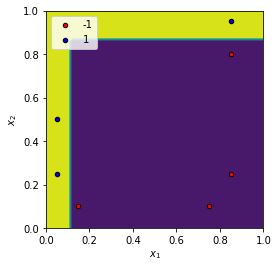

In [22]:
# plot observed data points and decision tree boundary after convergence
# reference: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
        
# Parameters
n_classes = 2
plot_colors = 'rb'
plot_step = 0.02

# Plot the decision boundary
x_bd_min, x_bd_max = 0, 1.02
y_bd_min, y_bd_max = 0, 1.02
xx_bd, yy_bd = np.meshgrid(np.arange(x_bd_min, x_bd_max, plot_step),
                    np.arange(y_bd_min, y_bd_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z_bd = dt.predict(np.c_[xx_bd.ravel(), yy_bd.ravel()])
Z_bd = Z_bd.reshape(xx_bd.shape)
cs = plt.contourf(xx_bd, yy_bd, Z_bd)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plot the training points
for i, color in zip([-1, 1], plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

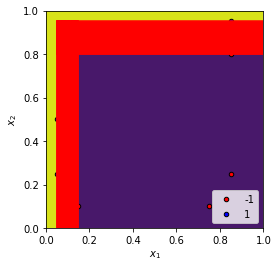

In [12]:
# plot observed data points, decision tree boundary after convergence, and all other decision boundaries with same error rate

# Parameters
n_classes = 2
plot_colors = 'rb'
plot_step = 0.02

# Plot the decision boundary
x_bd_min, x_bd_max = 0, 1.02
y_bd_min, y_bd_max = 0, 1.02
xx_bd, yy_bd = np.meshgrid(np.arange(x_bd_min, x_bd_max, plot_step),
                    np.arange(y_bd_min, y_bd_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z_bd = dt.predict(np.c_[xx_bd.ravel(), yy_bd.ravel()])
Z_bd = Z_bd.reshape(xx_bd.shape)
cs = plt.contourf(xx_bd, yy_bd, Z_bd)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plot the training points
for i, color in zip([-1, 1], plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

# other decision boundaries
x_other = np.arange(0.05, 0.15, 0.002)
y_other = 0.95
for xi in np.nditer(x_other):
    plt.plot([xi, xi], [0, y_other], 'r')
x_other = 0.05
y_other = np.arange(0.8, 0.952, 0.002)
for yi in np.nditer(y_other):
    plt.plot([x_other, 1], [yi, yi], 'r')

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## q1c

When $0 \leq k \leq 1$, $\min_{k} error = \frac{\pi}{4} - \frac{1}{2}$, $k^* = 1$

When $k > 1$, $\min_{k} error = \int_{0}^{\frac{1}{k^2}} (\sqrt{x} - kx) dx + \int_{\frac{1}{k^2}}^{\frac{1}{k}} (kx - \sqrt{x})dx + \int_{\frac{1}{k}}^{1} (1 - \sqrt{x}) dx$

In [26]:
from sympy import integrate
from sympy.abc import x, k
import scipy.optimize as opt

In [12]:
integrate(x**0.5 - k*x, (x, 0, 1/k**2)) + integrate(k*x - x**0.5, (x, 1/k**2, 1/k)) + integrate(1 - x**0.5, (x, 1/k, 1))

1.33333333333333*(k**(-2))**1.5 + 0.333333333333333 - 1/(2*k) - 1/k**3

In [36]:
def target(k):
    return 1.33333333333333*(k**(-2))**1.5 + 0.333333333333333 - 1/(2*k) - 1/k**3

opt.minimize(target, 1)

      fun: 0.09763107302369611
 hess_inv: array([[2.87164847]])
      jac: array([7.78958201e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([1.4142356])

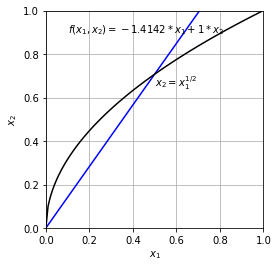

In [37]:
# plot of the true linear boundary on the basketball court

# true optimized linear boundary
plt.plot([0, 1 / 1.4142], [0, 1], 'b', )
plt.text(0.1, 0.9, r'$f(x_1, x_2) = -1.4142 * x_1 + 1 * x_2$' )

# true curve
x_true = np.arange(0, 1, 0.01, dtype = float)
y_true = x_true ** 0.5

plt.plot(x_true, y_true, 'black')
plt.text(0.5, 0.65, r'$x_2 = x_1^{1/2}$' )

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

## q1d

For the tree starting from $X_1$:

1) $0 \leq s_2 < \sqrt{s_1}$ and $\sqrt{s_1} < s_3 \leq 1$, $\min_{s_1, s_2, s_3} error = \int_{0}^{s_2^2} (s_2 - \sqrt{x}) dx + \int_{s_2^2}^{s_1} (\sqrt{x} - s_2) dx + \int_{s_1}^{s_3^2} (s_3 - \sqrt{x}) dx + \int_{s_3^2}^{1} (\sqrt{x} - s_3) dx$

2) $0 \leq s_2 < \sqrt{s_1}$ and $0 \leq s_3 \leq \sqrt{s_1}$, $\min_{s_1, s_2, s_3} error = \int_{0}^{s_2^2} (s_2 - \sqrt{x}) dx + \int_{s_2^2}^{s_1} (\sqrt{x} - s_2) dx + \int_{s_1}^{1} (\sqrt{x} - s_3) dx = \min_{s_1, s_2, s_3 = \sqrt{s_1}} (\int_{0}^{s_2^2} (s_2 - \sqrt{x}) dx + \int_{s_2^2}^{s_1} (\sqrt{x} - s_2) dx + \int_{s_1}^{1} (\sqrt{x} - \sqrt{s_1} dx)$

3) $\sqrt{s_1} \leq s_2 \leq 1$ and $\sqrt{s_1} < s_3 \leq 1$, $\min_{s_1, s_2, s_3} error = \int_{0}^{s_1} (s_2 - \sqrt{x}) dx + \int_{s_1}^{s_3^2} (s_3 - \sqrt{x}) dx + \int_{s_3^2}^{1} (\sqrt(x) - s_3) dx = \min_{s_1, s_2 = \sqrt{s_1}, s_3} (\int_{0}^{s_1} (\sqrt{s_1} - \sqrt{x}) dx + \int_{s_1}^{s_3^2} (s_3 - \sqrt{x}) dx + \int_{s_3^2}^{1} (\sqrt(x) - s_3) dx)$

4) $\sqrt{s_1} \leq s_2 \leq 1$ and $0 \leq s_3 \leq \sqrt{s_1}$, $\min_{s_1, s_2, s_3} error = \int_{0}^{s_1} (s_2 - \sqrt{x}) dx + \int_{s_1}^{1} (\sqrt{x} - s_3) dx = \min_{s_1, s_2 = \sqrt{s_1}, s_3 = \sqrt{s_1}} (\int_{0}^{s_1} (\sqrt{s_1} - \sqrt{x}) dx + \int_{s_1}^{1} (\sqrt{x} - \sqrt{s_1}) dx)$

In [31]:
from sympy.abc import a, b, c

In [41]:
i1 = integrate(b - x**0.5, (x, 0, b**2)) + integrate(x**0.5 - b, (x, b**2, a)) + integrate(c - x**0.5, (x, a, c**2)) + integrate(x**0.5 - c, (x, c**2, 1))
i2 = integrate(b - x**0.5, (x, 0, b**2)) + integrate(x**0.5 - b, (x, b**2, a)) + integrate(x**0.5 - a**0.5, (x, a, 1))
i3 = integrate(a**0.5 - x**0.5, (x, 0, a)) + integrate(c - x**0.5, (x, a, c**2)) + integrate(x**0.5 - c, (x, c**2, 1))
i4 = integrate(a**0.5 - x**0.5, (x, 0, a)) + integrate(x**0.5 - a**0.5, (x, a, 1))
print(i1)
print(i2)
print(i3)
print(i4)

-a*b - a*c + 1.33333333333333*a**1.5 + 2*b**3 + 2*c**3 - c - 1.33333333333333*(b**2)**1.5 - 1.33333333333333*(c**2)**1.5 + 0.666666666666667
-a**0.5 - a*b + 1.0*a**1.5 + 2*b**3 - 1.33333333333333*(b**2)**1.5 + 0.666666666666667
-a*c + 1.0*a**1.5 + 2*c**3 - c - 1.33333333333333*(c**2)**1.5 + 0.666666666666667
-a**0.5 + 0.666666666666667*a**1.5 + 0.666666666666667


In [48]:
def t1(p):
    a = p[0]
    b = p[1]
    c = p[2]
    return -a*b - a*c + 1.33333333333333*a**1.5 + 2*b**3 + 2*c**3 - c - 1.33333333333333*(b**2)**1.5 - 1.33333333333333*(c**2)**1.5 + 0.666666666666667

def t2(p):
    a = p[0]
    b = p[1]
    return -a**0.5 - a*b + 1.0*a**1.5 + 2*b**3 - 1.33333333333333*(b**2)**1.5 + 0.666666666666667

def t3(p):
    a = p[0]
    c = p[1]
    return -a*c + 1.0*a**1.5 + 2*c**3 - c - 1.33333333333333*(c**2)**1.5 + 0.666666666666667

def t4(p):
    a = p[0]
    return -a**0.5 + 0.666666666666667*a**1.5 + 0.666666666666667

m1 = opt.minimize(t1, [0.5, 0.25, 0.75])
m2 = opt.minimize(t2, [0.5, 0.25])
m3 = opt.minimize(t3, [0.5, 0.75])
m4 = opt.minimize(t4, [0.5])
print('Optimized results of i1:\n', m1, '\n============')
print('Optimized results of i2:\n', m2, '\n============')
print('Optimized results of i3:\n', m3, '\n============')
print('Optimized results of i4:\n', m4, '\n============')

Optimized results of i1:
       fun: 0.1035845342551841
 hess_inv: array([[1.45825619, 0.79763826, 0.42619826],
       [0.79763826, 0.98231132, 0.22749152],
       [0.42619826, 0.22749152, 0.43243692]])
      jac: array([ 1.01327896e-06,  1.42306089e-06, -2.80886889e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([0.42677801, 0.46194124, 0.84462275]) 
Optimized results of i2:
       fun: 0.13726367483277901
 hess_inv: array([[0.9802385 , 0.45420514],
       [0.45420514, 0.64092943]])
      jac: array([-4.16487455e-06,  4.24683094e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([0.63059963, 0.56151753]) 
Optimized results of i3:
       fun: 0.13214418284184914
 hess_inv: array([[0.91732409, 0.28837346],
       [0.28837346, 0.40599356]])
      jac: array([-1.49011612e-08,  4.24683094e-07])
  message: 

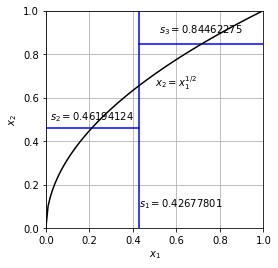

In [59]:
# plot of the true decision tree boundary on the basketball court

# true optimized decision tree boundary
plt.plot([0.42677801, 0.42677801], [0, 1], 'b', )
plt.plot([0, 0.42677801], [0.46194124, 0.46194124], 'b', )
plt.plot([0.42677801, 1], [0.84462275, 0.84462275], 'b', )
plt.text(0.42677801, 0.1, r'$s_1 = 0.42677801$' )
plt.text(0.02, 0.5, r'$s_2 = 0.46194124$' )
plt.text(0.52, 0.9, r'$s_3 = 0.84462275$' )

# true curve
x_true = np.arange(0, 1, 0.01, dtype = float)
y_true = x_true ** 0.5

plt.plot(x_true, y_true, 'black')
plt.text(0.5, 0.65, r'$x_2 = x_1^{1/2}$' )

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

## q1d

For the tree starting from $X_2$:

1) $0 \leq s_2 < s_1^2$ and $s_1^2 < s_3 \leq 1$, $\min_{s_1, s_2, s_3} error = \int_{0}^{s_2} \sqrt{x} dx + \int_{s_2}^{s_1^2} (s_1 - \sqrt{x}) dx + \int_{s_1^2}^{s_3} (\sqrt{x} - s_1) dx + \int_{s_3}^{1} (1 - \sqrt{x}) dx$

2) $ s_1^2 \leq s_2 \leq 1$ and $s_1^2 < s_3 \leq 1$, $\min_{s_1, s_2 = s_1^2, s_3} error = \int_{0}^{s_1^2} \sqrt{x} dx + \int_{s_1^2}^{s_3} (\sqrt{x} - s_1) dx + \int_{s_3}^{1} (1 - \sqrt{x}) dx$

3) $0 \leq s_2 < s_1^2$ and $0 \leq s_3 \leq s_1^2$, $\min_{s_1, s_2, s_3 = s_1^2} error = \int_{0}^{s_2} \sqrt{x} dx + \int_{s_2}^{s_1^2} (s_1 - \sqrt{x}) dx + \int_{s_1^2}^{1} (1 - \sqrt{x}) dx$

4) $ s_1^2 \leq s_2 \leq 1$  and $0 \leq s_3 \leq s_1^2$, $\min_{s_1, s_2 = s_1^2, s_3 = s_1^2} error = \int_{0}^{s_1^2} \sqrt{x} dx + \int_{s_1^2}^{1} (1 - \sqrt{x}) dx$

In [69]:
i1 = integrate(x**0.5, (x, 0, b)) + integrate(a - x**0.5, (x, b, a**2)) + integrate(x**0.5 - a, (x, a**2, c)) + integrate(1 - x**0.5, (x, c, 1))
i2 = integrate(x**0.5, (x, 0, a**2)) + integrate(x**0.5 - a, (x, a**2,  c)) + integrate(1 - x**0.5, (x, c, 1))
i3 = integrate(x**0.5, (x, 0, b)) + integrate((a - x**0.5), (x, b, a**2)) + integrate(1 - x**0.5, (x, a**2, 1))
i4 = integrate(x**0.5, (x, 0, a**2)) + integrate(1 - x**0.5, (x, a**2, 1))
print(i1)
print(i2)
print(i3)
print(i4)

2*a**3 - a*b - a*c + 1.33333333333333*b**1.5 - c + 1.33333333333333*c**1.5 - 1.33333333333333*(a**2)**1.5 + 0.333333333333333
a**3 - a*c - c + 1.33333333333333*c**1.5 + 0.333333333333333
a**3 - a**2 - a*b + 1.33333333333333*b**1.5 + 0.333333333333333
-a**2 + 1.33333333333333*(a**2)**1.5 + 0.333333333333333


In [74]:
def t1(p):
    a = p[0]
    b = p[1]
    c = p[2]
    return 2*a**3 - a*b - a*c + 1.33333333333333*b**1.5 - c + 1.33333333333333*c**1.5 - 1.33333333333333*(a**2)**1.5 + 0.333333333333333

def t2(p):
    a = p[0]
    c = p[1]
    return a**3 - a*c - c + 1.33333333333333*c**1.5 + 0.333333333333333

def t3(p):
    a = p[0]
    b = p[1]
    return a**3 - a**2 - a*b + 1.33333333333333*b**1.5 + 0.333333333333333

def t4(p):
    a = p[0]
    return -a**2 + 1.33333333333333*(a**2)**1.5 + 0.333333333333333

m1 = opt.minimize(t1, [0.5, 0, 0.75])
m2 = opt.minimize(t2, [0.5, 0.75])
m3 = opt.minimize(t3, [0.5, 0])
m4 = opt.minimize(t4, [0.5])
print('Optimized results of i1:\n', m1, '\n============')
print('Optimized results of i2:\n', m2, '\n============')
print('Optimized results of i3:\n', m3, '\n============')
print('Optimized results of i4:\n', m4, '\n============')

Optimized results of i1:
       fun: 0.11796176307566364
 hess_inv: array([[0.754286  , 0.22089811, 0.60325962],
       [0.22089811, 0.35077948, 0.17645841],
       [0.60325962, 0.17645841, 1.29050094]])
      jac: array([-9.42498446e-07,  7.15255737e-06,  8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([0.60762617, 0.09230456, 0.64611553]) 
Optimized results of i2:
       fun: 0.16863743887189886
 hess_inv: array([[0.60045677, 0.45294619],
       [0.45294619, 1.08529668]])
      jac: array([4.91738319e-07, 2.51084566e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([0.40582871, 0.49409035]) 
Optimized results of i3:
       fun: 0.15702479339561878
 hess_inv: array([[0.53617698, 0.20548689],
       [0.20548689, 0.4446449 ]])
      jac: array([4.25800681e-06, 2.20350921e-06])
  message: 'O

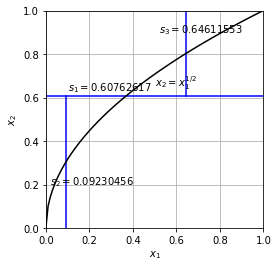

In [80]:
# plot of the true decision tree boundary on the basketball court

# true optimized decision tree boundary
plt.plot([0, 1], [0.60762617, 0.60762617], 'b', )
plt.plot([0.09230456, 0.09230456], [0, 0.60762617], 'b', )
plt.plot([0.64611553, 0.64611553], [0.60762617, 1], 'b', )
plt.text(0.1, 0.63, r'$s_1 = 0.60762617$' )
plt.text(0.02, 0.2, r'$s_2 = 0.09230456$' )
plt.text(0.52, 0.9, r'$s_3 = 0.64611553$' )

# true curve
x_true = np.arange(0, 1, 0.01, dtype = float)
y_true = x_true ** 0.5

plt.plot(x_true, y_true, 'black')
plt.text(0.5, 0.65, r'$x_2 = x_1^{1/2}$' )

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

## q1g

If $k \in [\frac{1}{2}, \infty)$, local optimized $k' = \frac{1}{2}$ minimizes $T' = \frac{1}{8}$.

If $k \in (\frac{1}{4}, \frac{1}{2})$, $min_{k} error = \int_{0}^{\frac{1}{2}} kx dx + \int_{\frac{1}{2}}^{\frac{1}{4k}} (\frac{1}{4} - kx) dx$

If $k \in [0, \frac{1}{4}]$, $min_{k} error = \int_{0}^{\frac{1}{2}} kx dx + \int_{\frac{1}{2}}^{1}(\frac{1}{4} - kx) dx = 0.0625$

In [85]:
integrate(k*x, (x, 0, 0.5)) + integrate(0.25 - k*x, (x, 0.5, 1/(4*k)))

0.25*k - 0.125 + 0.03125/k

In [86]:
def t1(k):
    return 0.25*k - 0.125 + 0.03125/k

m1 = opt.minimize(t1, 0.25)
print('Optimized results of i1:\n', m1, '\n============')

Optimized results of i1:
       fun: 0.0517766952966372
 hess_inv: array([[0.70968921]])
      jac: array([4.00468707e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.35355341]) 


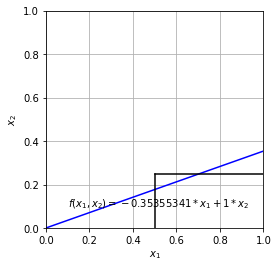

In [92]:
# plot of the true linear boundary on the basketball court

# true optimized linear boundary
plt.plot([0, 1], [0, 0.35355341], 'b', )
plt.text(0.1, 0.1, r'$f(x_1, x_2) = -0.35355341 * x_1 + 1 * x_2$' )

# true curve
plt.plot([0.5, 0.5], [0, 0.25], 'black')
plt.plot([0.5, 1], [0.25, 0.25], 'black')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()